In [424]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
warnings.filterwarnings("ignore")

# 1. LOAD THE DATA FILE USING PANDAS . . .

In [425]:
df=pd.read_csv('googleplaystore.csv')

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [427]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [428]:
df.shape

(10841, 13)

In [429]:
df.isnull().T

,0,1,2,3,4,5,6,7,8,9,...,10831,10832,10833,10834,10835,10836,10837,10838,10839,10840
App,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Category,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Rating,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,True,False,False
Reviews,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Size,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Installs,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Type,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Price,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Content Rating,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Genres,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [430]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


# 2. CHECK FOR NULL VALUES IN THE DATA. GET THE NUMBER OF NULL VALUES FOR EACH COLUMN . . .

In [431]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# 3. DROP RECORDS WITH NULLS IN ANY OF THE COLUMNS . . .

In [432]:
df.dropna(inplace=True)

In [433]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 4. VARIABLES SEEM TO HAVE INCORRECT TYPE AND INCONSISTENT FORMATTING. YOU NEED TO FIX THEM - 

4.1. SIZE COLUMN HAS SIZES IN KB AS WELL AS MB. TO ANALYZE, YOU’LL NEED TO CONVERT THESE TO NUMERIC . . .

• Extract the numeric value from the column

• Multiply the value by 1,000, if size is mentioned in Mb

In [434]:
def convert_size(size):
    if 'M' in size:
        x=size[:-1]
        x=float(x)*1000
        return(x)
    elif 'k'==size[:-1]:
        x=size[:-1]
        x=float(x)
        return(x)
    else:
        return None

In [435]:
df["Size"]=df["Size"].map(convert_size)

In [436]:
df.Size.describe()

count      7466.000000
mean      23746.316635
std       23467.457006
min        1000.000000
25%        5900.000000
50%       15000.000000
75%       34000.000000
max      100000.000000
Name: Size, dtype: float64

In [437]:
df.Size.fillna(method='ffill', inplace=True)
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [438]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

4.2. REVIEWS IS A NUMERIC FIELD THAT IS LOADED AS A STRING FIELD. CONVERT IT TO NUMERIC (INT/FLOAT) . . .

In [439]:
df.Reviews=df.Reviews.astype("int32")
df.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

4.3. INSTALLS FIELD IS CURRENTLY STORED AS STRING AND HAS VALUES LIKE 1,000,000+ . . .

4.3.1 Treat 1,000,000+ as 1,000,000

In [440]:
df.Installs.value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

4.3.2 remove ‘+’, ‘,’ from the field, convert it to integer

In [441]:
def remove_PlusandCommas(val):
    return int(val.replace(",","").replace("+",""))

In [442]:
df.Installs=df.Installs.map(remove_PlusandCommas)

In [443]:
df.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: int64

4.4. PRICE FIELD IS A STRING AND HAS DOLLOR SYMBOL. REMOVE  DOLLOR SIGN, AND CONVERT IT TO NUMERIC . . .

In [444]:
df['Price']=df.Price.map(lambda x: 0 if x=='0' else float(x[1:]))

In [445]:
df.Price

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9360, dtype: float64

# 5. SANITY CHECKS . . .

5.1 AVERAGE RATING SHOULD BE BETWEEN 1 AND 5 AS ONLY THESE VALUES ARE ALLOWED ON THE PLAY STORE. DROP THE ROWS THAT HAVE A VALUE OUTSIDE THIS RANGE . . .

In [446]:
df[df.Rating > 5].value_counts().sum()

0

► Insights = The Ratings are between 1 and 5.

5.2 REVIEWS SHOULD NOT BE MORE THAN INSTALLS AS ONLY THOSE WHO INSTALLED CAN REVIEW THE APP. IF THERE ARE ANY SUCH RECORDS, DROP THEM.

In [447]:
df[df.Reviews > df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [448]:
df[df.Reviews <= df.Installs].copy()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,3600.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


5.3 FOR FREE APPS (TYPE = “FREE”), THE PRICE SHOULD NOT BE >0. DROP ANY SUCH ROWS.

In [449]:
df[(df.Type == 'Free') & (df.Price > 0)].value_counts().sum()

0

# PERFORMING UNIVARIATE ANALYSIS :

• BOXPLOT FOR PRICE . . .
Are there any outliers? Think about the price of usual apps on Play Store.

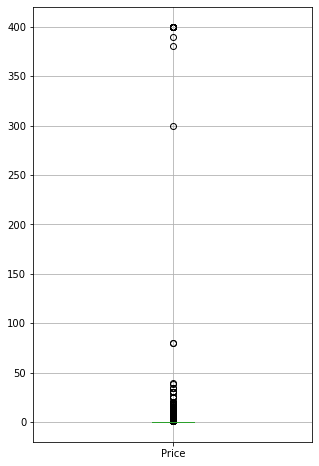

In [450]:
df.boxplot('Price', figsize=(5,8));

► Insights = Yes, there are Outliers.

• BOXPLOT FOR REVIEWS . . . Are there any apps with very high number of reviews? Do the values seem right?

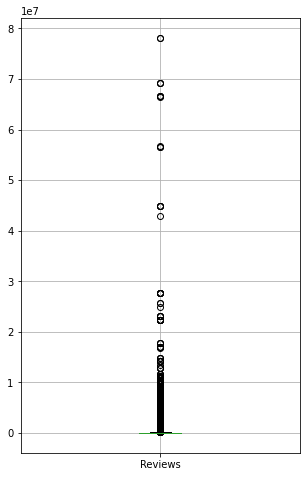

In [451]:
df.boxplot('Reviews', figsize=(5,8));

► Insights = There are higher number of Reviews, but are less than Installs.

• HISTOGRAM FOR RATING . . . How are the ratings distributed? Is it more toward higher ratings?

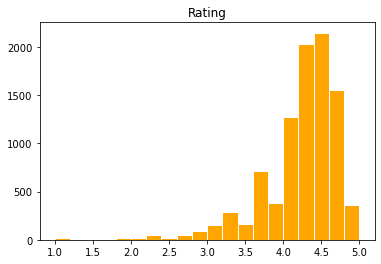

In [452]:
df.hist('Rating', grid=0, bins=20, color='orange', edgecolor='w');

► Insights = Ratings are distributed towards higher side.

• HISTOGRAM FOR SIZE . . .

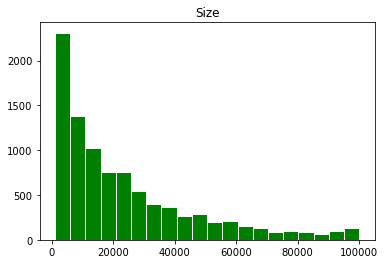

In [453]:
df.hist('Size', grid=0, color='g', bins=20, edgecolor='w');

► Obersvations -

1. Outliers are observed in Price & Review Plot.
2. In Price box Plot, some Apps are priced high.
3. Outliers to be dropped or neglected for better analysis.

In [454]:
df.shape

(9360, 13)

# 6. OUTLIER TREATMENT . . .

6.1. PRICE: FROM THE BOX PLOT, IT SEEMS LIKE THERE ARE SOME APPS WITH VERY HIGH PRICE. A PRICE OF $200 FOR AN APPLICATION ON THE PLAY STORE IS VERY HIGH AND SUSPICIOUS!

• CHECK OUT THE RECORDS WITH VERY HIGH PRICE . . .

In [455]:
df[(df.Price > 200)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,22000.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


• DROP THESE AS MOST SEEM TO BE JUNK APPS . . .

In [456]:
df=df[df.Price<=200].copy()

In [457]:
df.shape

(9345, 13)

6.2. REVIEWS: VERY FEW APPS HAVE VERY HIGH NUMBER OF REVIEWS. THESE ARE ALL STAR APPS THAT DON’T HELP WITH THE ANALYSIS AND, IN FACT, WILL SKEW IT. DROP RECORDS HAVING MORE THAN 2 MILLION REVIEWS.

In [458]:
df[(df.Reviews > 2000000)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,3100.0,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,35000.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,35000.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,17000.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,17000.0,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.0,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
9841,Google Earth,TRAVEL_AND_LOCAL,4.3,2339098,63000.0,100000000,Free,0.0,Everyone,Travel & Local,"June 18, 2018",9.2.17.13,4.1 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [459]:
df=df[(df.Reviews <= 2000000)].copy()

In [460]:
df.shape

(8892, 13)

6.3. INSTALLS:  THERE SEEMS TO BE SOME OUTLIERS IN THIS FIELD TOO. APPS HAVING VERY HIGH NUMBER OF INSTALLS SHOULD BE DROPPED FROM THE ANALYSIS.

• FIND OUT THE DIFFERENT PERCENTILES – 10, 25, 50, 70, 90, 95, 99

In [461]:
df.Installs.quantile([0.1, 0.25, 0.5, 0.7, 0.9, 0.95, 0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

► 99% the Install of Apps are below 100 million, 1% are above 100 million

• DECIDE A THRESHOLD AS CUTOFF FOR OUTLIER AND DROP RECORDS HAVING VALUES MORE THAN THAT . . .

In [462]:
len(df[df.Installs > 100000000])

20

In [463]:
df[df.Installs > 100000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,5000.0,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
3265,Gboard - the Google Keyboard,TOOLS,4.2,1859115,15000.0,500000000,Free,0.0,Everyone,Tools,"July 31, 2018",Varies with device,Varies with device
3326,Gboard - the Google Keyboard,TOOLS,4.2,1859109,8900.0,500000000,Free,0.0,Everyone,Tools,"July 31, 2018",Varies with device,Varies with device
3473,Dropbox,PRODUCTIVITY,4.4,1861310,61000.0,500000000,Free,0.0,Everyone,Productivity,"August 1, 2018",Varies with device,Varies with device
3476,Google Calendar,PRODUCTIVITY,4.2,858208,1600.0,500000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3533,Google Calendar,PRODUCTIVITY,4.2,858227,37000.0,500000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3562,Google Calendar,PRODUCTIVITY,4.2,858230,15000.0,500000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3569,Dropbox,PRODUCTIVITY,4.4,1861309,61000.0,500000000,Free,0.0,Everyone,Productivity,"August 1, 2018",Varies with device,Varies with device
3574,Cloud Print,PRODUCTIVITY,4.1,282460,3800.0,500000000,Free,0.0,Everyone,Productivity,"May 23, 2018",Varies with device,Varies with device
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,13000.0,1000000000,Free,0.0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device


In [464]:
df=df[df.Installs<=100000000].copy()

In [465]:
df.shape

(8872, 13)

# 7. BIVARIATE ANALYSIS . . .

LET’S LOOK AT HOW THE AVAILABLE PREDICTORS RELATE TO THE VARIABLE OF INTEREST, I.E., OUR TARGET VARIABLE RATING. MAKE SCATTER PLOTS (FOR NUMERIC FEATURES) AND BOX PLOTS (FOR CHARACTER FEATURES) TO ASSESS THE RELATIONS BETWEEN RATING AND THE OTHER FEATURES.

7.1. MAKE SCATTER PLOT/JOINPLOT FOR RATING VS. PRICE . . .

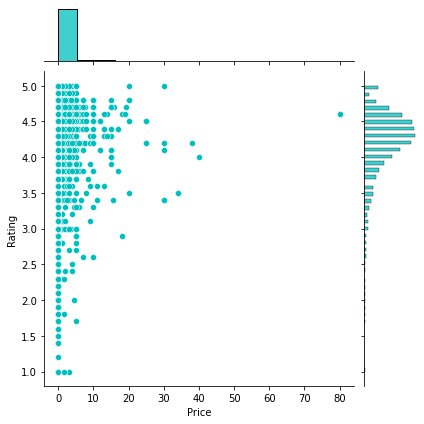

In [466]:
sns.jointplot(df.Price, df.Rating, color='c');

► Ratings will not be compared with Price.

7.2. MAKE SCATTER PLOT/JOINPLOT FOR RATING VS. SIZE

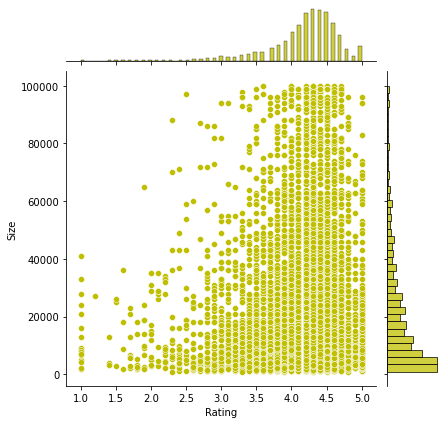

In [467]:
sns.jointplot(df.Rating, df.Size, color='y');

► Heavier App rated better.

7.3. MAKE SCATTER PLOT/JOINPLOT FOR RATING VS. REVIEWS

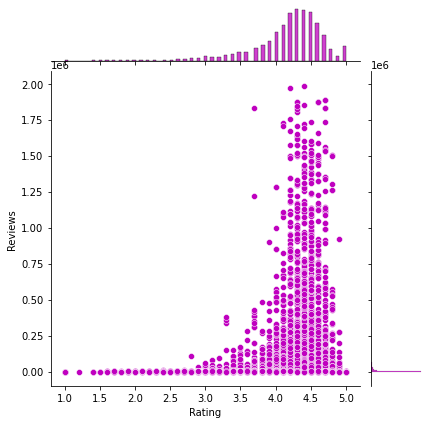

In [468]:
sns.jointplot(df.Rating, df.Reviews, color='m');

► Does more review mean a better rating always?

Yes

7.4. MAKE BOXPLOT FOR RATING VS. CONTENT RATING

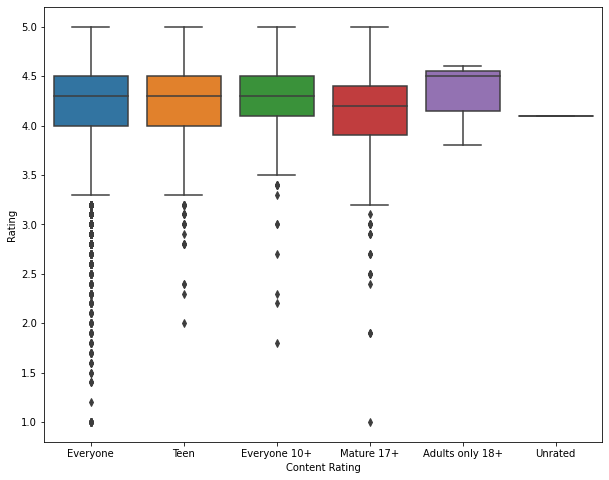

In [469]:
plt.figure(figsize=(10,8));
sns.boxplot(df['Content Rating'], df.Rating);

► Is there any difference in the ratings? Are some types liked better?

Small difference between Rating & Content Rating found.

7.5. MAKE BOXPLOT FOR RATINGS VS. CATEGORY

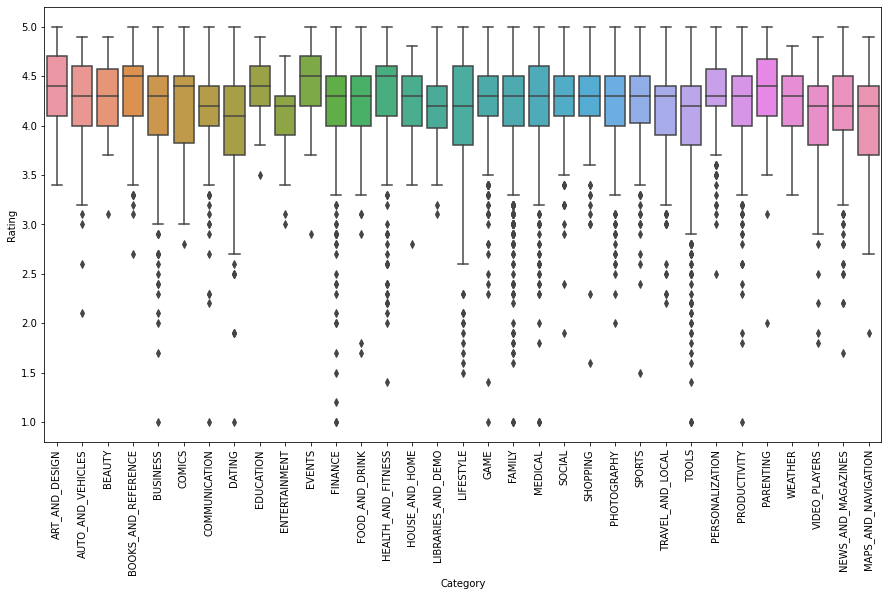

In [470]:
plt.figure(figsize=(15,8));
plt.xticks(rotation=90)
sns.boxplot(df['Category'], df.Rating);

► Which genre has the best ratings?

Art & Design and Events has best Ratings.

# 8. DATA PREPROCESSING . . .

FOR THE STEPS BELOW, CREATE A COPY OF THE DATAFRAME TO MAKE ALL THE EDITS. NAME IT INP1.

In [471]:
inp1=df.copy()

8.1. REVIEWS AND INSTALL HAVE SOME VALUES THAT ARE STILL RELATIVELY VERY HIGH.

BEFORE BUILDING A LINEAR REGRESSION MODEL, YOU NEED TO REDUCE THE SKEW. APPLY LOG TRANSFORMATION (NP.LOG1P) TO REVIEWS AND INSTALLS.

In [472]:
inp1.Installs.describe()

count    8.872000e+03
mean     4.811280e+06
std      1.415110e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+08
Name: Installs, dtype: float64

In [473]:
inp1.Reviews.describe()

count    8.872000e+03
mean     1.023423e+05
std      2.614215e+05
min      1.000000e+00
25%      1.580000e+02
50%      4.229500e+03
75%      5.607725e+04
max      1.986068e+06
Name: Reviews, dtype: float64

In [474]:
inp1.Installs=inp1.Installs.apply(np.log1p)

In [475]:
inp1.Reviews=inp1.Reviews.apply(np.log1p)

8.2. DROP COLUMNS APP, LAST UPDATED, CURRENT VER, AND ANDROID VER. THESE VARIABLES ARE NOT USEFUL FOR OUR TASK.

In [476]:
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [477]:
inp1.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver'],axis=1, inplace=True)

In [478]:
inp1.shape

(8872, 9)

8.3. GET DUMMY COLUMNS FOR CATEGORY, GENRES, AND CONTENT RATING. THIS NEEDS TO BE DONE AS THE MODELS DO NOT UNDERSTAND CATEGORICAL DATA, AND ALL DATA SHOULD BE NUMERIC.

DUMMY ENCODING IS ONE WAY TO CONVERT CHARACTER FIELDS TO NUMERIC. NAME OF DATAFRAME SHOULD BE INP2.



In [479]:
inp2=pd.get_dummies(inp1,drop_first=True)

In [480]:
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

# 9. TRAIN TEST SPLIT  AND APPLY 70-30 SPLIT. NAME THE NEW DATAFRAMES DF_TRAIN AND DF_TEST. . . .

In [481]:
df_train, df_test = train_test_split(inp2, train_size=0.7, random_state=100)

In [482]:
df_train.shape

(6210, 157)

In [483]:
df_test.shape

(2662, 157)

# 10. SEPARATE THE DATAFRAMES INTO X_TRAIN, Y_TRAIN, X_TEST, AND Y_TEST . . .

In [484]:
y_train = df_train.pop('Rating')
x_train = df_train

In [485]:
y_test = df_test.pop('Rating')
x_test = df_test

# 11. MODEL BUILDING . . .

• USE LINEAR REGRESSION AS THE TECHNIQUE.

In [486]:
lr = LinearRegression()

In [487]:
lr.fit(x_train, y_train)

LinearRegression()

• REPORT THE R2 ON THE TRAIN SET.

In [488]:
y_train_pred = lr.predict(x_train)
r2_score(y_train, y_train_pred)

0.16193207879348903

# 12. MAKE PREDICTIONS ON TEST SET AND REPORT R2 . . .

In [489]:
y_test_pred = lr.predict(x_test)
r2_score(y_test, y_test_pred)

0.14561362604803607